In [6]:
import pandas as pd
import numpy as np
import re
import glob
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [2]:
data = pd.read_csv('../results/autocorrelation_nofrc1.csv',index_col=0)

In [13]:
# get rid of boring data :
data = data[data.dt < 100]
data = data[data.dt > 1]
data = data.dropna()

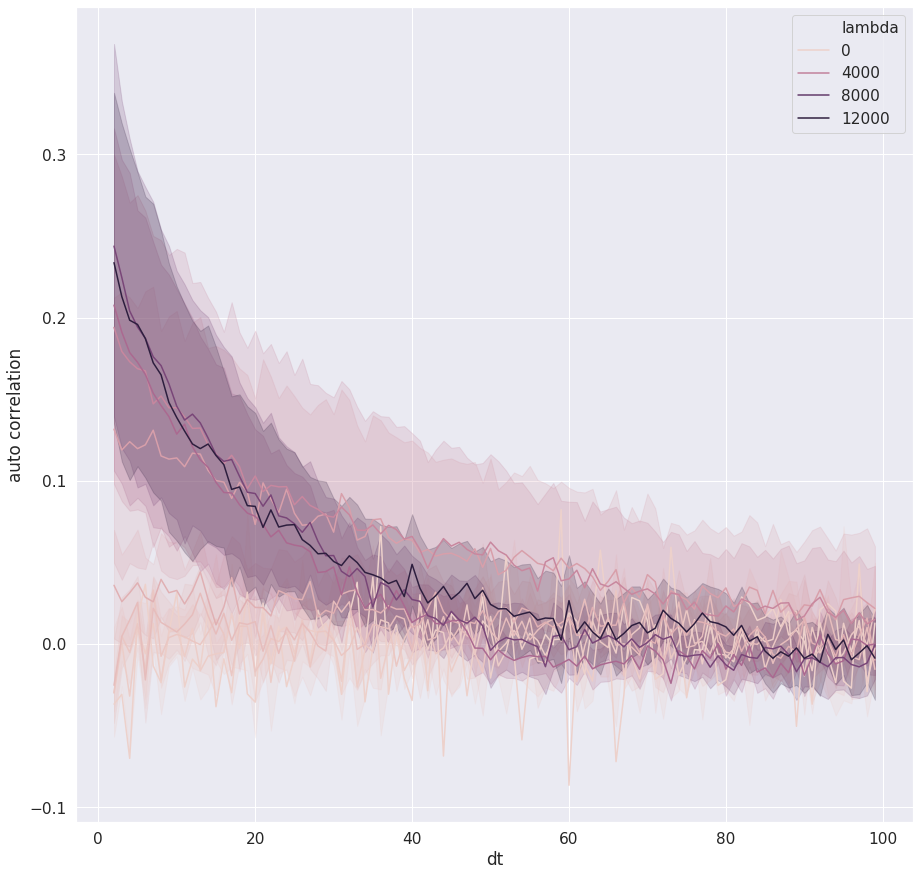

In [15]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'lambda', data = data, dashes = False)
plt.show()

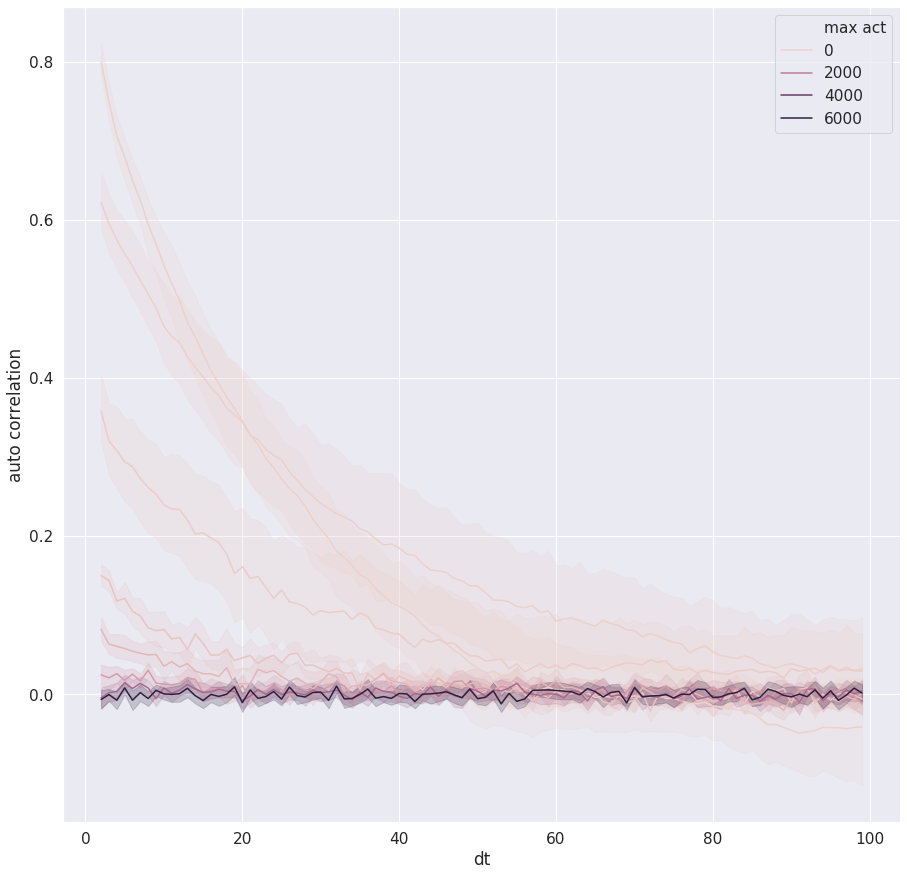

In [16]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'max act', data = data, dashes = False)
plt.show()

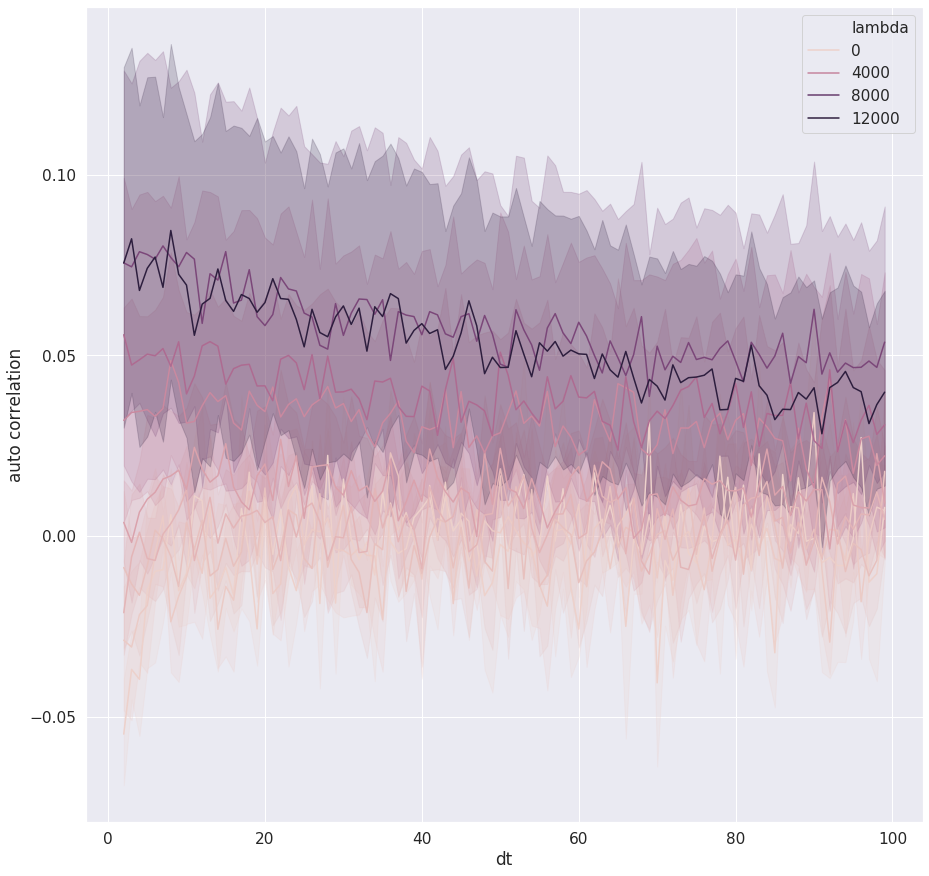

In [17]:
# next 
data = pd.read_csv('../results/autocorrelation_nofrc2.csv',index_col=0)
# get rid of boring data :
data = data[data.dt < 100]
data = data[data.dt > 1]
data = data.dropna()
# plot :
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'lambda', data = data, dashes = False)
plt.show()

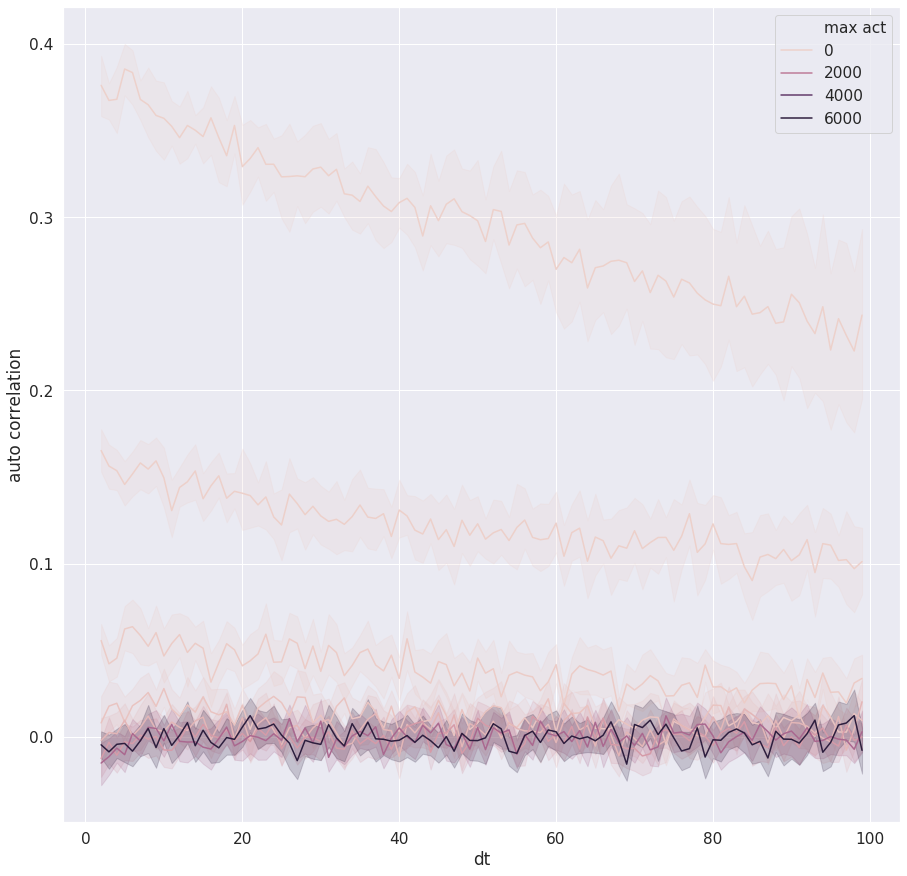

In [18]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'max act', data = data, dashes = False)
plt.show()